In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
import os
%matplotlib inline
os.getcwd()
os.chdir('/Users/srivantv/Desktop')



In [2]:

data = pd.read_csv('tcc_ceds_music.csv')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28372 entries, 0 to 28371
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                28372 non-null  int64  
 1   artist_name               28372 non-null  object 
 2   track_name                28372 non-null  object 
 3   release_date              28372 non-null  int64  
 4   genre                     28372 non-null  object 
 5   lyrics                    28372 non-null  object 
 6   len                       28372 non-null  int64  
 7   dating                    28372 non-null  float64
 8   violence                  28372 non-null  float64
 9   world/life                28372 non-null  float64
 10  night/time                28372 non-null  float64
 11  shake the audience        28372 non-null  float64
 12  family/gospel             28372 non-null  float64
 13  romantic                  28372 non-null  float64
 14  commun

/var/folders/9r/flfzkryx2yvgk0hgxphjzvxm0000gn/T/ipykernel_6791/1123690039.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['danceability'])


<Axes: xlabel='danceability', ylabel='Density'>

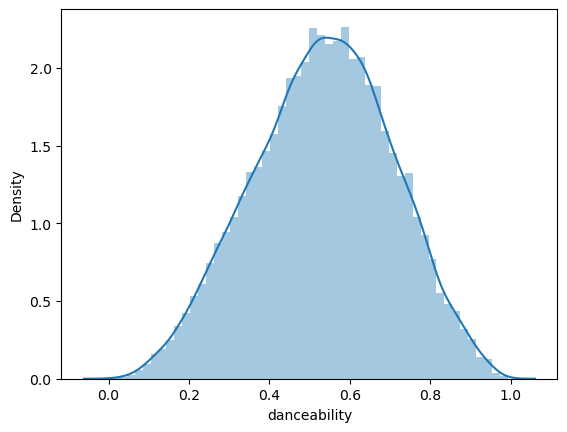

In [4]:
sns.distplot(data['danceability'])

In [76]:
print(data['track_name'])

0                 mohabbat bhi jhoothi
1                            i believe
2                                  cry
3                             patricia
4                   apopse eida oneiro
                     ...              
28367                  10 million ways
28368    ante up (robbin hoodz theory)
28369                    whutcha want?
28370                           switch
28371                           r.i.p.
Name: track_name, Length: 28372, dtype: object


In [5]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

In [6]:
data['decade'] = data['release_date'].apply(get_decade)


In [7]:
import plotly.express as px 
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(data, x='release_date', y=sound_features)
fig.show()


ValueError: All arguments should have the same length. The length of argument `y` is 6, whereas the length of  previously-processed arguments ['release_date'] is 28372

In [ ]:
print(data.columns)


In [ ]:
top10_genres = data.nlargest(10, 'popularity')
fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()

In [8]:
from sklearn.cluster import KMeans

In [9]:
numeric_columns = ['release_date', 'danceability', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy']
data_for_clustering = data[numeric_columns]


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

In [11]:
k = 10  # Replace with the number of clusters you want
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

/Users/srivantv/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [12]:
data['cluster'] = clusters

# Print the number of data points in each cluster
print(data['cluster'].value_counts())

# Analyze the statistics of each cluster
cluster_stats = data.groupby('cluster')[numeric_columns].mean()
print(cluster_stats)


9    4013
4    3459
3    3238
8    3206
7    3191
2    3128
6    2995
1    2856
5    1564
0     722
Name: cluster, dtype: int64
         release_date  danceability  loudness  acousticness  instrumentalness  \
cluster                                                                         
0         1981.710526      0.479993  0.476524      0.786042          0.786039   
1         2009.382703      0.620642  0.734498      0.150983          0.015748   
2         1967.363811      0.568773  0.630080      0.704783          0.012744   
3         1978.114886      0.469093  0.685952      0.151005          0.027290   
4         2001.631975      0.350487  0.766858      0.054443          0.036963   
5         1995.332481      0.497482  0.692127      0.143670          0.719706   
6         1998.569950      0.491077  0.629859      0.590289          0.021780   
7         1970.960201      0.388564  0.519943      0.780962          0.021429   
8         1986.106051      0.715988  0.595519      0.211503   

In [13]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Assuming you have 'data' DataFrame with your features and 'cluster' column
# Here, we'll use a subset of numeric columns for t-SNE
numeric_columns = ['release_date', 'danceability', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy']
X = data[numeric_columns]

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=2))])
embedding = tsne_pipeline.fit_transform(X)

projection = pd.DataFrame(columns=['x', 'y'], data=embedding)
projection['cluster'] = data['cluster']


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 28372 samples in 0.021s...
[t-SNE] Computed neighbors for 28372 samples in 1.528s...
[t-SNE] Computed conditional probabilities for sample 1000 / 28372
[t-SNE] Computed conditional probabilities for sample 2000 / 28372
[t-SNE] Computed conditional probabilities for sample 3000 / 28372
[t-SNE] Computed conditional probabilities for sample 4000 / 28372
[t-SNE] Computed conditional probabilities for sample 5000 / 28372
[t-SNE] Computed conditional probabilities for sample 6000 / 28372
[t-SNE] Computed conditional probabilities for sample 7000 / 28372
[t-SNE] Computed conditional probabilities for sample 8000 / 28372
[t-SNE] Computed conditional probabilities for sample 9000 / 28372
[t-SNE] Computed conditional probabilities for sample 10000 / 28372
[t-SNE] Computed conditional probabilities for sample 11000 / 28372
[t-SNE] Computed conditional probabilities for sample 12000 / 28372
[t-SNE] Computed conditional probabilities for sam

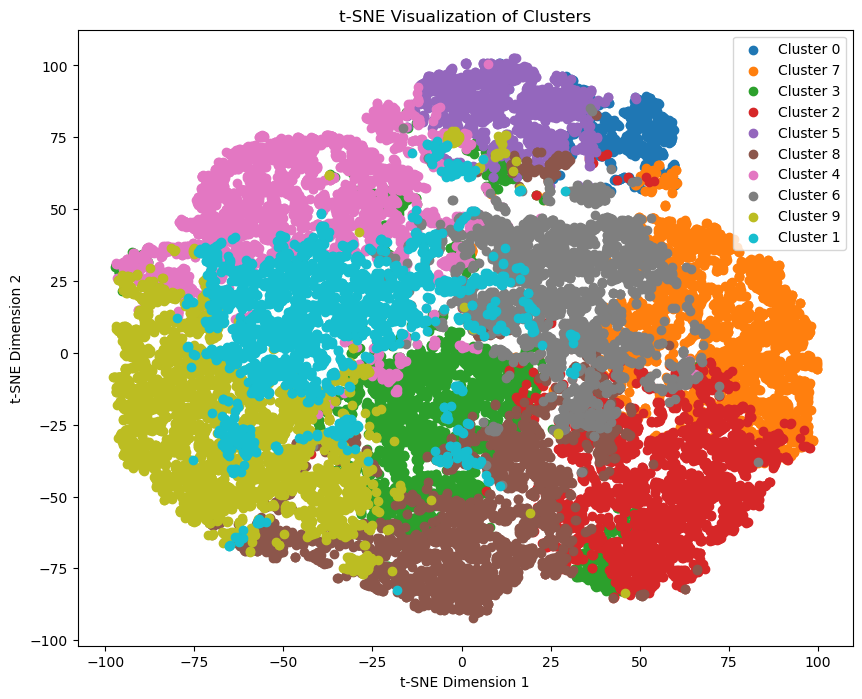

In [14]:
import matplotlib.pyplot as plt

# Assuming 'projection' DataFrame has the 'x', 'y', and 'cluster' columns
plt.figure(figsize=(10, 8))

# Plot each cluster separately with a different color
for cluster_id in projection['cluster'].unique():
    cluster_data = projection[projection['cluster'] == cluster_id]
    plt.scatter(cluster_data['x'], cluster_data['y'], label=f'Cluster {cluster_id}')

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Clusters')
plt.legend()
plt.show()


In [15]:
from spotipy.oauth2 import SpotifyOAuth


In [16]:
CLIENT_ID = "a02c2305152c41848519395bc9b1601f"
CLIENT_SECRET = "8548939bbd414252b2d94d84be1ec91e"
REDIRECT_URI = "http://localhost:8888/lab/workspaces/auto-i/tree/MusicRecommender.ipynb/callback"

# Initialize the SpotifyOAuth object
sp_oauth = spotipy.oauth2.SpotifyOAuth(client_id=CLIENT_ID, client_secret=CLIENT_SECRET, redirect_uri=REDIRECT_URI, scope="user-library-read")



In [17]:
auth_url = sp_oauth.get_authorize_url()
print("Please visit this URL to authorize the application:", auth_url)


Please visit this URL to authorize the application: https://accounts.spotify.com/authorize?client_id=a02c2305152c41848519395bc9b1601f&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%3A8888%2Flab%2Fworkspaces%2Fauto-i%2Ftree%2FMusicRecommender.ipynb%2Fcallback&scope=user-library-read


In [18]:
from urllib.parse import urlparse, parse_qs

# Example callback URL with authorization code
redirect_url = "http://localhost:8888/lab/workspaces/auto-i/tree/MusicRecommender.ipynb/callback?code=AQC8AEbSxSObEbqCMEC5HeDqacYjrgF2-zJnm6qeJb-wJ50JM_m3Orr0ylyx1S6lDC4DORIOyCwdViatKOqY6voIoalQAZC-xNo7n4gU8jK3z4gjWXzndzrGNhuDZ91yfKfAUa2qNarYZo5iVHj4TgCqm-elpB4y31EkbfdrGxZQcE1Qxvlb8J4lSgX3VDc9--h6WU_GVsk0e0yVNHGQ1VsHL9j5i6X29tWsYPZUoGkEE2DPLkjKJR1mMFAaXXI6EKXWVgx_-g"

# Parse the URL to extract query parameters
parsed_url = urlparse(redirect_url)

# Extract the authorization code from the query parameters
auth_code = parse_qs(parsed_url.query)["code"][0]

print("Authorization code:", auth_code)

Authorization code: AQC8AEbSxSObEbqCMEC5HeDqacYjrgF2-zJnm6qeJb-wJ50JM_m3Orr0ylyx1S6lDC4DORIOyCwdViatKOqY6voIoalQAZC-xNo7n4gU8jK3z4gjWXzndzrGNhuDZ91yfKfAUa2qNarYZo5iVHj4TgCqm-elpB4y31EkbfdrGxZQcE1Qxvlb8J4lSgX3VDc9--h6WU_GVsk0e0yVNHGQ1VsHL9j5i6X29tWsYPZUoGkEE2DPLkjKJR1mMFAaXXI6EKXWVgx_-g


In [19]:
token_info = sp_oauth.get_access_token(auth_code)
access_token = token_info["access_token"]

/var/folders/9r/flfzkryx2yvgk0hgxphjzvxm0000gn/T/ipykernel_6791/2317904689.py:1: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  token_info = sp_oauth.get_access_token(auth_code)


In [20]:
sp = spotipy.Spotify(auth=access_token)


In [21]:
liked_tracks = sp.current_user_saved_tracks()


In [95]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyOAuth

# Initialize Spotify API with authentication
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=CLIENT_ID, client_secret=CLIENT_SECRET, redirect_uri=REDIRECT_URI, scope="user-library-read"))

# Initialize a variable to keep track of the offset
offset = 0

# Set the maximum number of tracks you want to retrieve (e.g., 1000)
max_tracks = 1000

# Initialize an empty list to store track information
liked_tracks_info = []

# Loop until you've retrieved all liked tracks or reached the maximum
while True:
    # Retrieve a page of liked tracks
    liked_tracks = sp.current_user_saved_tracks(limit=50, offset=offset)

    # Loop through and extract track IDs
    track_ids = [item['track']['id'] for item in liked_tracks['items']]

    # Retrieve audio features for the current page of tracks
    track_features = sp.audio_features(track_ids)

    # Iterate through track IDs to get detailed track features
    for i, track_info in enumerate(liked_tracks['items']):
        # Merge track information and features
        track_info.update(track_features[i])
        liked_tracks_info.append(track_info)

    # Increment the offset
    offset += len(liked_tracks['items'])

    # Check if you've reached the maximum number of tracks or if there are no more tracks
    if offset >= max_tracks or len(liked_tracks['items']) == 0:
        break

# Create a DataFrame from the extracted information
liked_tracks_df = pd.DataFrame(liked_tracks_info)

# Display the DataFrame
print(liked_tracks_df.head())

# Define the list of columns you want to extract
columns_to_extract = ['danceability', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy']

# Use indexing to select only the desired columns
liked_tracks_subset = liked_tracks_df[columns_to_extract]


               added_at                                              track  \
0  2023-08-31T17:34:40Z  {'album': {'album_type': 'album', 'artists': [...   
1  2023-08-28T06:10:37Z  {'album': {'album_type': 'compilation', 'artis...   
2  2023-08-28T05:54:25Z  {'album': {'album_type': 'album', 'artists': [...   
3  2023-08-27T13:17:49Z  {'album': {'album_type': 'album', 'artists': [...   
4  2023-08-22T08:47:12Z  {'album': {'album_type': 'album', 'artists': [...   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.484   0.731    1    -6.694     1       0.0379       0.43100   
1         0.715   0.639    5    -5.017     0       0.0752       0.06220   
2         0.370   0.467    5    -9.013     1       0.0273       0.02050   
3         0.533   0.858    2    -4.212     1       0.0766       0.00021   
4         0.532   0.623    5    -9.208     1       0.0331       0.53800   

   instrumentalness  liveness  valence    tempo            type  \
0          0.

In [96]:
# Define the list of columns you want to extract
columns_to_extract = ['danceability', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy']

# Use indexing to select only the desired columns
liked_tracks_subset = liked_tracks_df[columns_to_extract]

# Now, 'liked_tracks_subset' contains only the specified columns


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 357 samples in 0.000s...
[t-SNE] Computed neighbors for 357 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 357 / 357
[t-SNE] Mean sigma: 0.506313
[t-SNE] Computed conditional probabilities in 0.002s


/Users/srivantv/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[t-SNE] Iteration 50: error = 69.4260712, gradient norm = 0.0914471 (50 iterations in 0.288s)
[t-SNE] Iteration 100: error = 66.9994507, gradient norm = 0.0425444 (50 iterations in 0.034s)
[t-SNE] Iteration 150: error = 66.7985687, gradient norm = 0.0457192 (50 iterations in 0.034s)
[t-SNE] Iteration 200: error = 66.5383224, gradient norm = 0.0387566 (50 iterations in 0.036s)
[t-SNE] Iteration 250: error = 66.5194244, gradient norm = 0.0336413 (50 iterations in 0.034s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.519424
[t-SNE] Iteration 300: error = 0.9358202, gradient norm = 0.0118340 (50 iterations in 0.027s)
[t-SNE] Iteration 350: error = 0.8463166, gradient norm = 0.0074267 (50 iterations in 0.028s)
[t-SNE] Iteration 400: error = 0.8219153, gradient norm = 0.0045982 (50 iterations in 0.037s)
[t-SNE] Iteration 450: error = 0.8144295, gradient norm = 0.0026881 (50 iterations in 0.034s)
[t-SNE] Iteration 500: error = 0.8104342, gradient norm = 0.0024750 (50 

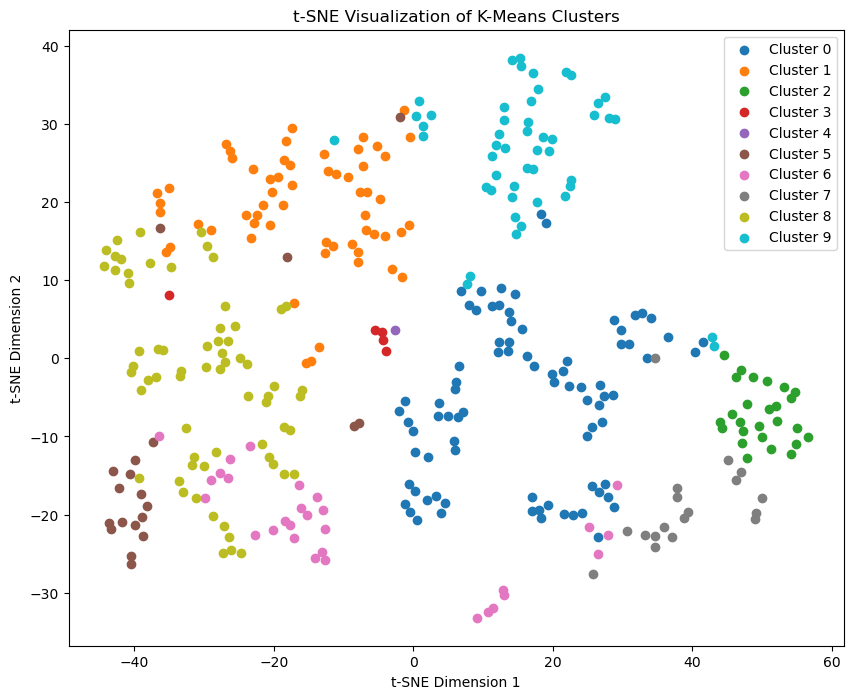

In [97]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Standardize the data
scaler = StandardScaler()
liked_tracks_scaled = scaler.fit_transform(liked_tracks_subset)

# Perform k-means clustering (specify the number of clusters)
n_clusters = 10# You can change this to the desired number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(liked_tracks_scaled)

# Reduce dimensionality with t-SNE
tsne = TSNE(n_components=2, perplexity=10, verbose=2)
embedding = tsne.fit_transform(liked_tracks_scaled)

# Create a DataFrame for visualization
embedding_with_cluster = np.column_stack((embedding, clusters))
projection = pd.DataFrame(data=embedding_with_cluster, columns=['x', 'y', 'cluster'])
projection['cluster'] = clusters  # Add cluster labels

# Plot the clusters
plt.figure(figsize=(10, 8))
#colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

for cluster_id in range(n_clusters):
    cluster_data = projection[projection['cluster'] == cluster_id]
    plt.scatter(cluster_data['x'], cluster_data['y'], label=f'Cluster {cluster_id}')#, color=colors[cluster_id])

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of K-Means Clusters')
plt.legend()
plt.show()


In [98]:
# Count the number of songs in your dataset
num_songs = len(liked_tracks_scaled)  # or len(embedding)

# Print the number of songs
print("Number of songs:", num_songs)


Number of songs: 357


/Users/srivantv/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 28372 samples in 0.012s...
[t-SNE] Computed neighbors for 28372 samples in 0.882s...
[t-SNE] Computed conditional probabilities for sample 1000 / 28372
[t-SNE] Computed conditional probabilities for sample 2000 / 28372
[t-SNE] Computed conditional probabilities for sample 3000 / 28372
[t-SNE] Computed conditional probabilities for sample 4000 / 28372
[t-SNE] Computed conditional probabilities for sample 5000 / 28372
[t-SNE] Computed conditional probabilities for sample 6000 / 28372
[t-SNE] Computed conditional probabilities for sample 7000 / 28372
[t-SNE] Computed conditional probabilities for sample 8000 / 28372
[t-SNE] Computed conditional probabilities for sample 9000 / 28372
[t-SNE] Computed conditional probabilities for sample 10000 / 28372
[t-SNE] Computed conditional probabilities for sample 11000 / 28372
[t-SNE] Computed conditional probabilities for sample 12000 / 28372
[t-SNE] Computed conditional probabilities for sam

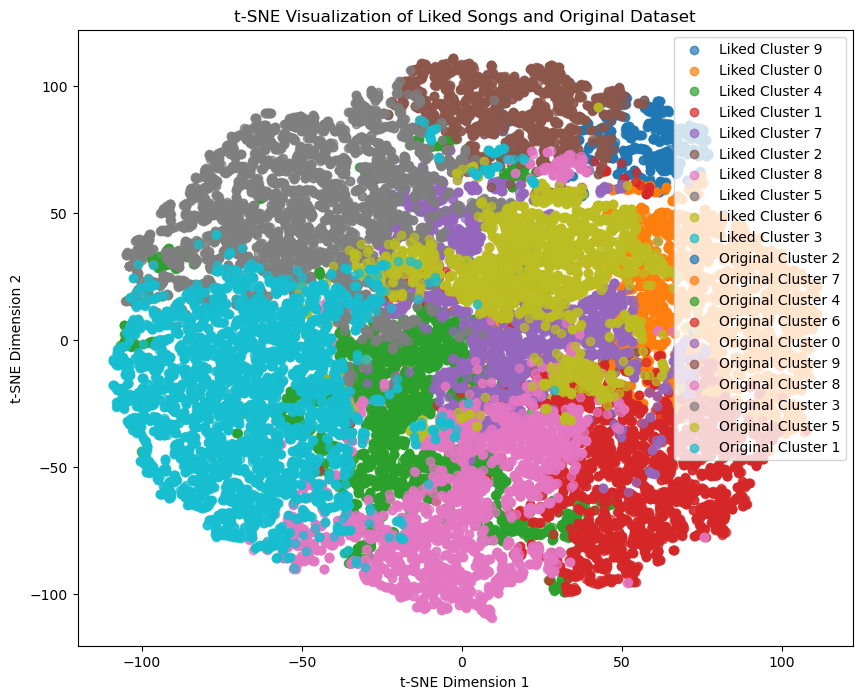

In [99]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have already retrieved the liked tracks using the Spotify API
# The variable 'projection' contains the 'x', 'y', and 'cluster' columns for liked songs

# Standardize the data for the original song dataset
original_data_scaled = scaler.fit_transform(X[numeric_columns])

# Perform k-means clustering for the original song dataset
original_clusters = kmeans.fit_predict(original_data_scaled)

# Reduce dimensionality with t-SNE for the original song dataset
original_embedding = tsne.fit_transform(original_data_scaled)

# Create a DataFrame for visualization of the original song dataset
original_embedding_with_cluster = np.column_stack((original_embedding, original_clusters))
original_projection = pd.DataFrame(data=original_embedding_with_cluster, columns=['x', 'y', 'cluster'])
original_projection['cluster'] = original_clusters  # Add cluster labels

# Create a single scatter plot combining liked songs and original dataset
plt.figure(figsize=(10, 8))

# Plot each cluster separately with a different color for liked songs
for cluster_id in projection['cluster'].unique():
    cluster_data = projection[projection['cluster'] == cluster_id]
    plt.scatter(cluster_data['x'], cluster_data['y'], label=f'Liked Cluster {cluster_id}', alpha=0.7)

# Plot each cluster separately with a different color for the original dataset
for cluster_id in original_projection['cluster'].unique():
    cluster_data = original_projection[original_projection['cluster'] == cluster_id]
    plt.scatter(cluster_data['x'], cluster_data['y'], label=f'Original Cluster {cluster_id}', alpha=0.7)

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Liked Songs and Original Dataset')
plt.legend()
plt.show()


In [100]:
import numpy as np

# Step 1: Calculate the centroid of liked songs
centroid_x = projection['x'].mean()
centroid_y = projection['y'].mean()

# Step 2: Find the 10 nearest songs to the centroid
projection['distance_to_centroid'] = np.sqrt((projection['x'] - centroid_x) ** 2 + (projection['y'] - centroid_y) ** 2)
nearest_songs = projection.sort_values(by='distance_to_centroid').drop_duplicates(subset=['cluster']).head(10)

# Display the names of the 10 nearest songs (replace 'song_column' with the actual column name containing song names)
print("10 Nearest Unique Songs to Centroid:")
for idx, row in nearest_songs.iterrows():
    cluster_id = row['cluster']
    song_name = data[data['cluster'] == cluster_id]['track_name'].values[0] # Replace 'song_column' with your song name column
    artist_name=data[data['cluster'] == cluster_id]['artist_name'].values[0]
    print(f"{song_name} by {artist_name}")


10 Nearest Unique Songs to Centroid:
papa-oom-mow-mow by the beach boys
patricia by pérez prado
mohabbat bhi jhoothi by mukesh
apothecary by ambrosia
let's stick together by bryan ferry
chicken reel by les paul
brazil by les paul
hurry sundown by little richard
i believe by frankie laine
apopse eida oneiro by giorgos papadopoulos
